Task 1: Simple Linear Regression  
● Use the scikit-learn library. <br>
● Load the California Housing Dataset (or any house price dataset). <br>
● Predict the house price using a single feature (e.g., number of rooms). <br>
● Train a simple linear regression model. <br>
● Plot the regression line using matplotlib.


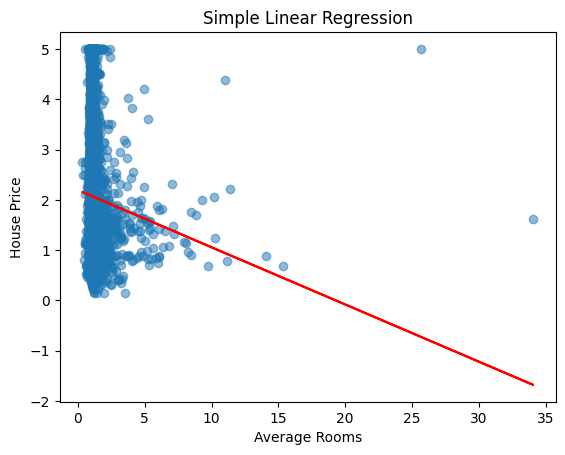

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

data = fetch_california_housing()
X = data.data[:, [3]] 
y = data.target

model = LinearRegression()
model.fit(X, y)

plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Average Rooms")
plt.ylabel("House Price")
plt.title("Simple Linear Regression")
plt.show()


Task 2: Multiple Linear Regression  
● Use the same dataset or load another dataset with at least 4 numeric features. <br>
● Predict the target variable using multiple independent variables. <br>
● Evaluate the model using: <br>
  ○ R-squared <br>
  ○ Mean Squared Error (MSE) <br>
  ○ Root Mean Squared Error (RMSE) <br>
● Display the coefficients of each feature.


In [2]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

xdata = data.data
ydata = data.target

modelmulti = LinearRegression()
modelmulti.fit(xdata, ydata)
ypred = modelmulti.predict(xdata)

r2 = r2_score(ydata, ypred)
mse = mean_squared_error(ydata, ypred)
rmse = sqrt(mse)
coeff = modelmulti.coef_

print("R-squared:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("Feature Coefficients:", coeff)


R-squared: 0.606232685199805
MSE: 0.5243209861846072
RMSE: 0.7241001216576387
Feature Coefficients: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


Task 3: Feature Scaling and Normalization  
● Demonstrate the effect of standardizing features using StandardScaler. <br>
● Split the data into training and test sets. <br>
● Train a Linear Regression model on raw features and evaluate it using R², MSE, and RMSE. <br>
● Scale the features using StandardScaler and train a second model. <br>
● Compare performance before and after scaling.


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.2, random_state=42)

scaler = StandardScaler()
xtrainscale = scaler.fit_transform(xtrain)
xtestscale = scaler.transform(xtest)

modelscale = LinearRegression()
modelscale.fit(xtrainscale, ytrain)
ypredscale = modelscale.predict(xtestscale)

r2scale = r2_score(ytest, ypredscale)
msescale = mean_squared_error(ytest, ypredscale)
rmsescale = sqrt(msescale)

print("R-squared (scaled):", r2scale)
print("MSE (scaled):", msescale)
print("RMSE (scaled):", rmsescale)


R-squared (scaled): 0.575787706032451
MSE (scaled): 0.5558915986952442
RMSE (scaled): 0.7455813830127763


Task 4: Model Interpretation  
● Write Python code to: <br>
  ○ Show the correlation matrix using a heatmap. <br>
  ○ Identify which features have the strongest relationship with the target. <br>
  ○ Discuss multicollinearity and how it might affect regression.


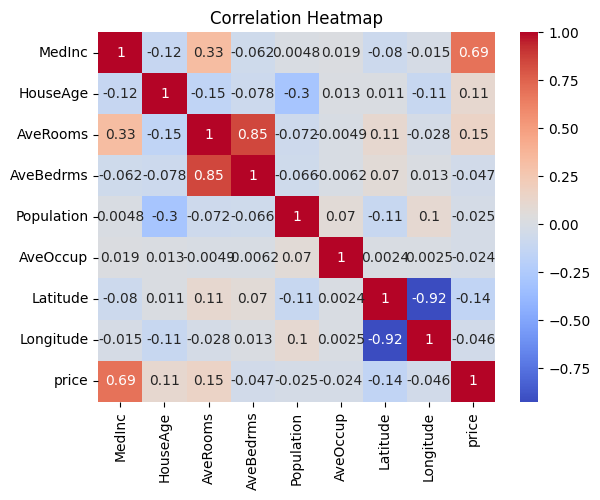

Strongest correlations price:
 MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: price, dtype: float64

Factor (VIF):
       feature         vif
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [4]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df["price"] = data.target

corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

topcorr = corr["price"].drop("price").abs().sort_values(ascending=False)
print("Strongest correlations price:\n", topcorr)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vifdata = pd.DataFrame()
vifdata["feature"] = df.drop("price", axis=1).columns
vifdata["vif"] = [variance_inflation_factor(df.drop("price", axis=1).values, i) for i in range(df.drop("price", axis=1).shape[1])]
print("\nFactor (VIF):\n", vifdata)


Multicollinearity occurs when two or more independent variables are highly correlated.  
This can cause instability in the regression coefficients, making the model sensitive to small changes in the data.  
Using VIF (Variance Inflation Factor), we can identify which features may be contributing to multicollinearity.  
Typically, a VIF > 5 (or 10) suggests that the feature is highly collinear and may need to be removed or combined.
